# Part 1 : TensorFlow ---------------------------------------------------------

In [96]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tn


# Step 1 : import the dataset

In [97]:

data = pd.read_csv('diabetes.csv')
data.columns

Index(['-0.294118', '0.487437', '0.180328', '-0.292929', '0', '0.00149028',
       '-0.53117', '-0.0333333', '0.1'],
      dtype='object')

In [98]:
# We dont have column names, so adding header to them
data = data.set_axis(['fr1','fr2','fr3','fr4','fr5','fr6','fr7','fr9','target'],axis=1)

# Step 2: Preprocessing the Data & Visualization

In [99]:
data.head()

,fr1,fr2,fr3,fr4,fr5,fr6,fr7,fr9,target
0,-0.882353,-0.145729,0.081967,-0.414141,0.000000,-0.207153,-0.766866,-0.666667,1
1,-0.058824,0.839196,0.049180,0.000000,0.000000,-0.305514,-0.492741,-0.633333,0
2,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,0.000000,1
3,0.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000,0
4,-0.411765,0.165829,0.213115,0.000000,0.000000,-0.236960,-0.894962,-0.700000,1


In [100]:
data.describe()

,fr1,fr2,fr3,fr4,fr5,fr6,fr7,fr9,target
count,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000
mean,-0.407807,0.218208,0.176500,-0.289731,-0.323961,-0.032289,-0.663427,-0.516799,0.654354
std,0.386493,0.306465,0.201420,0.258651,0.375608,0.205508,0.283202,0.400674,0.475893
min,-0.882353,-0.557789,-0.606557,-0.858586,-0.966903,-0.457526,-0.994876,-0.966667,0.000000
25%,-0.764706,-0.005025,0.016393,-0.494949,-0.716312,-0.179583,-0.858241,-0.866667,0.000000
50%,-0.529412,0.165829,0.180328,-0.292929,0.000000,-0.034277,-0.748506,-0.633333,1.000000
75%,0.000000,0.407035,0.311475,0.000000,0.000000,0.087929,-0.532451,-0.233333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [101]:
# to check is is there any duplicate rows
data.duplicated().sum()

0

In [102]:
data.isnull().sum()

fr1       0
fr2       0
fr3       0
fr4       0
fr5       0
fr6       0
fr7       0
fr9       0
target    0
dtype: int64

In [103]:
data.shape

(758, 9)

array([[<Axes: title={'center': 'fr1'}>, <Axes: title={'center': 'fr2'}>,
        <Axes: title={'center': 'fr3'}>],
       [<Axes: title={'center': 'fr4'}>, <Axes: title={'center': 'fr5'}>,
        <Axes: title={'center': 'fr6'}>],
       [<Axes: title={'center': 'fr7'}>, <Axes: title={'center': 'fr9'}>,
        <Axes: title={'center': 'target'}>]], dtype=object)

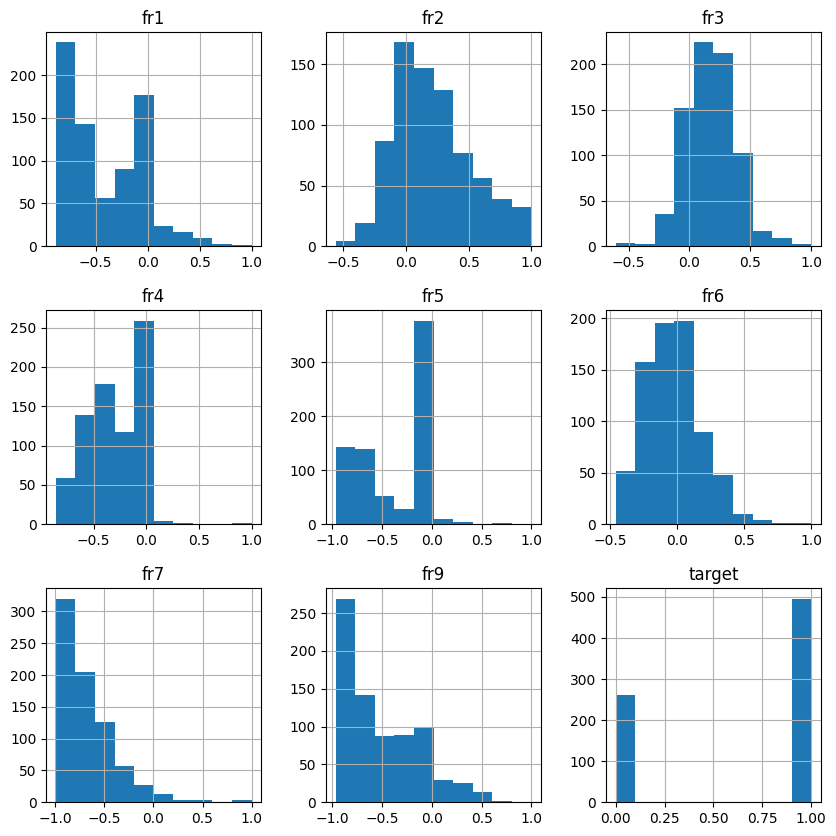

In [104]:
# visualizations of each data field
data.hist(figsize=(10,10))

<Axes: >

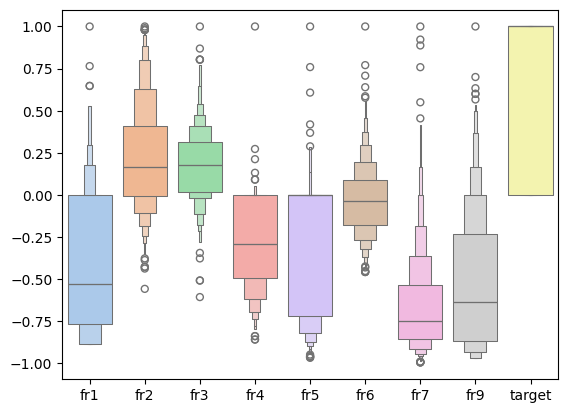

In [105]:
# Box plot to identify outliers
import seaborn as sns
sns.boxenplot(data=data,palette='pastel')

<Axes: >

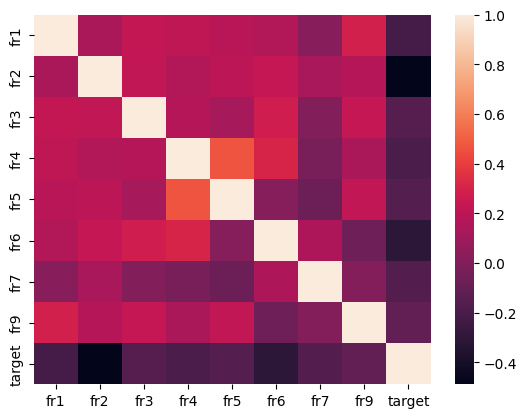

In [106]:
# heapMap to check Correlation of data points 
sns.heatmap(data.corr())

# Step 3: Split into 70% train 30% test

In [107]:
# Data needs to be scaled.

from sklearn.model_selection import train_test_split

x = data.drop(columns=['target'])
y = data['target']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_trained_scaled  = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


x_trained_scaled

array([[-0.01924968, -0.22083283,  0.34204625, ..., -0.19423045,
        -0.37066807,  0.70479237],
       [-1.23740727, -1.4535344 , -1.27872991, ...,  0.11026748,
         2.3178001 , -0.97630421],
       [ 0.28528972, -1.19401862,  0.50412426, ..., -0.19423045,
        -0.2551938 ,  0.53668195],
       ...,
       [-1.23740727, -0.72364506, -1.92704097, ..., -1.1367224 ,
        -0.97172368, -1.14441462],
       [ 1.04663951, -0.57766751,  0.34204625, ..., -2.05021917,
         0.3369789 , -0.72413985],
       [-0.62832848,  1.88773208, -0.63042034, ...,  0.21176676,
        -0.5838508 , -0.8081938 ]])

# Step 4: Modify the model 

In [108]:
# Now we will apply Keras for 

import tensorflow 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [109]:
# Creating Object 
model = Sequential()

In [110]:
model.add(Dense(3,activation='sigmoid',input_dim = 8)) # First Hidden Layer
model.add(Dense(1,activation='sigmoid')) # Output Layer

# Here, we can see how many weights and bias are given to each layer
model.summary()

# for better performance and acuracy while compile time we will declare loss_function and Optimizers
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_34 (Dense)                │ (None, 3)              │            27 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

# Step 5:  Train the model on the data

In [111]:
# we willl store all the values of 'accuracy' & 'loss' in a variable to plot graph of loss and Accuracy
acc_loss_model = model.fit(x_trained_scaled,y_train,epochs=20, validation_split=0.3)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3360 - loss: 1.0848 - val_accuracy: 0.3962 - val_loss: 0.9760
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3313 - loss: 1.0688 - val_accuracy: 0.3962 - val_loss: 0.9608
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3415 - loss: 1.0365 - val_accuracy: 0.3962 - val_loss: 0.9457
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3613 - loss: 1.0016 - val_accuracy: 0.3962 - val_loss: 0.9316
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3347 - loss: 1.0211 - val_accuracy: 0.3962 - val_loss: 0.9176
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3394 - loss: 0.9992 - val_accuracy: 0.3962 - val_loss: 0.9043
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2711 - loss: 1.0430 - val_accuracy: 0.3962 - val_loss: 0.8911
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3324 - loss: 0.9655 - val_accuracy: 0.3962 - val_loss:

# Step 6 : Model is ready for prediction

In [112]:
y_pred_data = model.predict(x_test_scaled)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


# Step 7: Accuracy Calculation

In [113]:
from sklearn.metrics import accuracy_score

# Now, This is out task to convert prediction value in 0 & 1. for that we will apply condition, 
# if probability is > 0.5 then 1 (cutomer will leave the bank) , other wise 0 (cutomer will not leave the bank) 

y_final_pred = np.where(y_pred_data>0.5, 1, 0)
Accuracy = accuracy_score(y_test,y_final_pred)

print('Accuracy of the ANN is : ',  Accuracy*100,'%')

Accuracy of the ANN is :  33.33333333333333 %


# Difference of loss_value between training and testing phase

In [114]:
acc_loss_model.history

{'accuracy': [0.33423179388046265,
  0.33423179388046265,
  0.33423179388046265,
  0.33423179388046265,
  0.33423179388046265,
  0.33423179388046265,
  0.33423179388046265,
  0.33423179388046265,
  0.33423179388046265,
  0.33423179388046265,
  0.33423179388046265,
  0.33423179388046265,
  0.33423179388046265,
  0.33423179388046265,
  0.33423179388046265,
  0.33423179388046265,
  0.33423179388046265,
  0.33423179388046265,
  0.33423179388046265,
  0.33423179388046265],
 'loss': [1.087496042251587,
  1.0680105686187744,
  1.0498186349868774,
  1.0315966606140137,
  1.0146664381027222,
  0.9979190230369568,
  0.9825707674026489,
  0.966559648513794,
  0.9524029493331909,
  0.9379494786262512,
  0.9243850708007812,
  0.9121356010437012,
  0.8989890217781067,
  0.8870813250541687,
  0.8756053447723389,
  0.8647181391716003,
  0.8538426160812378,
  0.8440627455711365,
  0.8340010643005371,
  0.8250055313110352],
 'val_accuracy': [0.3962264060974121,
  0.3962264060974121,
  0.3962264060974121

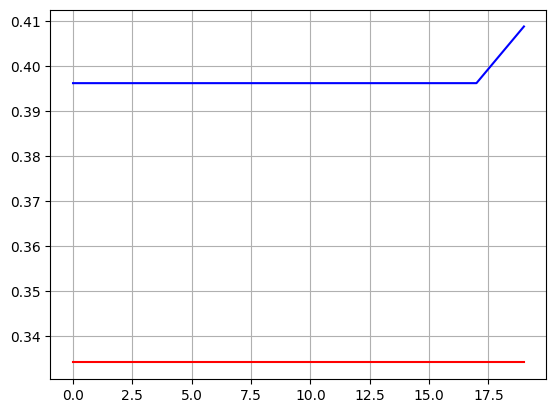

In [115]:
plt.plot(acc_loss_model.history['accuracy'],color='Red')
plt.plot(acc_loss_model.history['val_accuracy'],color='blue')
plt.grid()

# Step 8: Hypothesize

# 1) Changing the number of layers 

In [116]:

# Creating Object 
model = Sequential()

# Model Architecture
model.add(Dense(3,activation='sigmoid',input_dim = 8)) # First Hidden Layer
model.add(Dense(3,activation='sigmoid')) # Second Hidden Layer
model.add(Dense(1,activation='sigmoid')) # Output Layer

# Model Compilation
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Model Training
model_train = model.fit(x_trained_scaled,y_train,epochs=20, validation_split=0.3)

# Model Prediction
y_pred_data = model.predict(x_test_scaled)

# accuracy calculation of model 
y_final_pred = np.where(y_pred_data>0.5, 1, 0)
Accuracy = accuracy_score(y_test,y_final_pred)

print('Accuracy of the ANN is : ',  Accuracy*100,'%')

# History of model accuracy & loss
model_train.history

Epoch 1/20


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6542 - loss: 0.6775 - val_accuracy: 0.6038 - val_loss: 0.6822
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6622 - loss: 0.6734 - val_accuracy: 0.6038 - val_loss: 0.6805
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6839 - loss: 0.6667 - val_accuracy: 0.6038 - val_loss: 0.6790
Epoch 4/20


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6696 - loss: 0.6657 - val_accuracy: 0.6038 - val_loss: 0.6778
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7098 - loss: 0.6545 - val_accuracy: 0.6038 - val_loss: 0.6766
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6720 - loss: 0.6596 - val_accuracy: 0.6038 - val_loss: 0.6757
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7178 - loss: 0.6454 - val_accuracy: 0.6038 - val_loss: 0.6748
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6491 - loss: 0.6615 - val_accuracy: 0.6038 - val_loss: 0.6741
Epoch 9/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7017 - loss: 0.6442 - val_accuracy: 0.6038 - val_loss: 0.6734
Epoch 10/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6525 - loss: 0.6569 - val_accuracy: 0.6038 - val_loss: 0.6729
Epoch 11/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6494 - loss: 0.6563 - val_accuracy: 0.6038 - val_loss: 0.6724
E

{'accuracy': [0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374],
 'loss': [0.6752989292144775,
  0.672102689743042,
  0.6690905094146729,
  0.6661688089370728,
  0.6635320782661438,
  0.660975456237793,
  0.658689022064209,
  0.6561806797981262,
  0.6546247601509094,
  0.6521701216697693,
  0.650340735912323,
  0.6485228538513184,
  0.6469481587409973,
  0.6454171538352966,
  0.6439858675003052,
  0.6428540349006653,
  0.6415809988975525,
  0.6406087279319763,
  0.6395062804222107,
  0.6386703848838806],
 'val_accuracy': [0.6037735939025879,
  0.6037735939025879,
  0.6037735939025879,
  0.6037735939025879

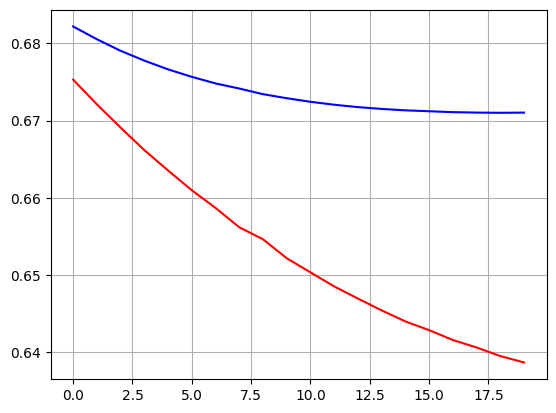

In [117]:
# Model accuracy Graph
plt.plot(model_train.history['loss'],color='Red')
plt.plot(model_train.history['val_loss'],color='blue')
plt.grid()

# Description 
- As we can see by adding additional layer on Neural network we achive around 0.64 of loss while training we achived 0.61.

# 2) Changing number of Dense

In [118]:

# Creating Object 
model = Sequential()

# Model Architecture
model.add(Dense(5,activation='sigmoid',input_dim = 8)) # First Hidden Layer
model.add(Dense(5,activation='sigmoid')) # Second Hidden Layer
model.add(Dense(1,activation='sigmoid')) # Output Layer

# Model Compilation
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Model Training
model_train = model.fit(x_trained_scaled,y_train,epochs=20, validation_split=0.3)

# Model Prediction
y_pred_data = model.predict(x_test_scaled)

# accuracy calculation of model 
y_final_pred = np.where(y_pred_data>0.5, 1, 0)
Accuracy = accuracy_score(y_test,y_final_pred)

print('Accuracy of the ANN is : ',  Accuracy*100,'%')

# History of model accuracy & loss
model_train.history

Epoch 1/20


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3256 - loss: 0.9020 - val_accuracy: 0.3962 - val_loss: 0.8263
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3591 - loss: 0.8511 - val_accuracy: 0.3962 - val_loss: 0.8086
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2923 - loss: 0.8791 - val_accuracy: 0.3962 - val_loss: 0.7918
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3404 - loss: 0.8238 - val_accuracy: 0.3962 - val_loss: 0.7769
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3144 - loss: 0.8217 - val_accuracy: 0.3962 - val_loss: 0.7632
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3400 - loss: 0.7921 - val_accuracy: 0.3962 - val_loss: 0.7505
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3266 - loss: 0.7777 - val_accuracy: 0.3962 - val_loss: 0.7387
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3382 - loss: 0.7586 - val_accuracy: 0.3962 - val_loss: 0.7279
Epo

{'accuracy': [0.33423179388046265,
  0.33423179388046265,
  0.33423179388046265,
  0.33423179388046265,
  0.33423179388046265,
  0.33423179388046265,
  0.33423179388046265,
  0.33423179388046265,
  0.33423179388046265,
  0.33423179388046265,
  0.33423179388046265,
  0.3396226465702057,
  0.36927223205566406,
  0.520215630531311,
  0.6495956778526306,
  0.7008086442947388,
  0.684636116027832,
  0.6900269389152527,
  0.671159029006958,
  0.6684635877609253],
 'loss': [0.8892487287521362,
  0.8662889003753662,
  0.8457667231559753,
  0.8251709938049316,
  0.807096004486084,
  0.7897526621818542,
  0.7738431692123413,
  0.7587381601333618,
  0.7452899217605591,
  0.7325913906097412,
  0.7203165292739868,
  0.7097616195678711,
  0.7003251910209656,
  0.691514253616333,
  0.683251142501831,
  0.6758745908737183,
  0.6695688366889954,
  0.6633208990097046,
  0.6580480933189392,
  0.6533576846122742],
 'val_accuracy': [0.3962264060974121,
  0.3962264060974121,
  0.3962264060974121,
  0.396226

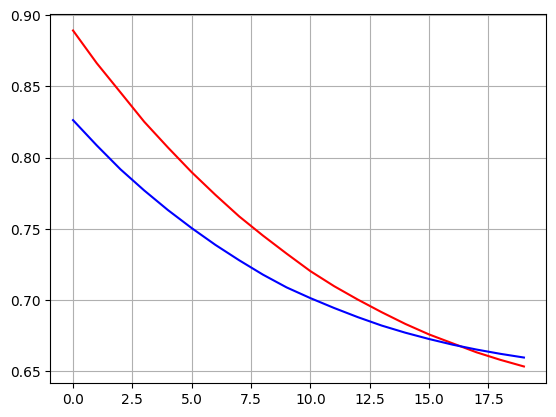

In [119]:
# Model accuracy Graph
plt.plot(model_train.history['loss'],color='Red')
plt.plot(model_train.history['val_loss'],color='blue')
plt.grid()

# Description 
- As we can see by adding additional dense on Neural network we achive around 0.65 of loss while training we achived 0.62.

# 3) Changing activation function as 'ReLU'

In [120]:

# Creating Object 
model = Sequential()

# Model Architecture
model.add(Dense(5,activation='relu',input_dim = 8)) # First Hidden Layer
model.add(Dense(5,activation='relu')) # Second Hidden Layer
model.add(Dense(1,activation='sigmoid')) # Output Layer

# Model Compilation
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Model Training
model_train = model.fit(x_trained_scaled,y_train,epochs=20, validation_split=0.3)

# Model Prediction
y_pred_data = model.predict(x_test_scaled)

# accuracy calculation of model 
y_final_pred = np.where(y_pred_data>0.5, 1, 0)
Accuracy = accuracy_score(y_test,y_final_pred)

print('Accuracy of the ANN is : ',  Accuracy*100,'%')

# History of model accuracy & loss
model_train.history

Epoch 1/20


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6597 - loss: 0.7507 - val_accuracy: 0.6038 - val_loss: 0.8023
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6688 - loss: 0.7454 - val_accuracy: 0.6038 - val_loss: 0.7763
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6349 - loss: 0.7462 - val_accuracy: 0.6038 - val_loss: 0.7553
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6807 - loss: 0.6990 - val_accuracy: 0.6038 - val_loss: 0.7413
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6608 - loss: 0.7217 - val_accuracy: 0.6038 - val_loss: 0.7277
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6780 - loss: 0.6914 - val_accuracy: 0.6038 - val_loss: 0.7175
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6618 - loss: 0.6994 - val_accuracy: 0.6038 - val_loss: 0.7081
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6864 - loss: 0.6728 - val_accuracy: 0.6038 - val_loss: 0.7012
Epo

{'accuracy': [0.657681941986084,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374],
 'loss': [0.760338306427002,
  0.7431243062019348,
  0.7284652590751648,
  0.7147352695465088,
  0.7058817744255066,
  0.696921706199646,
  0.6909713745117188,
  0.6844984292984009,
  0.6791593432426453,
  0.6738777756690979,
  0.6689721941947937,
  0.6645022034645081,
  0.6605827808380127,
  0.6565101146697998,
  0.6527956128120422,
  0.649311900138855,
  0.6461808681488037,
  0.6430655717849731,
  0.640153706073761,
  0.6370896697044373],
 'val_accuracy': [0.6037735939025879,
  0.6037735939025879,
  0.6037735939025879,
  0.6037735939025879,

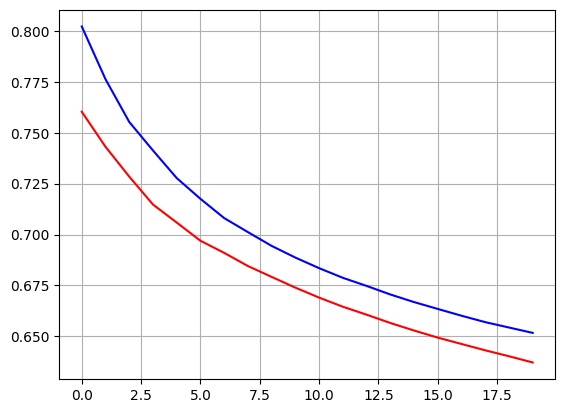

In [121]:
# Model accuracy Graph
plt.plot(model_train.history['loss'],color='Red')
plt.plot(model_train.history['val_loss'],color='blue')
plt.grid()

# Description 
- As we can see by changing activation function layer on Neural network we achive around 0.56 of loss while testing phase. This is better than previous two hypothesize.

# 4) Changing Loss Function with 'mean_squared_error'

In [122]:
# Creating Object 
model = Sequential()

# Model Architecture
model.add(Dense(5,activation='relu',input_dim = 8)) # First Hidden Layer
model.add(Dense(5,activation='relu')) # Second Hidden Layer
model.add(Dense(1,activation='sigmoid')) # Output Layer

# Model Compilation
model.compile(loss='mean_squared_error', optimizer='Adam', metrics=['accuracy'])

# Model Training
model_train = model.fit(x_trained_scaled,y_train,epochs=20, validation_split=0.3)

# Model Prediction
y_pred_data = model.predict(x_test_scaled)

# accuracy calculation of model 
y_final_pred = np.where(y_pred_data>0.5, 1, 0)
Accuracy = accuracy_score(y_test,y_final_pred)

print('Accuracy of the ANN is : ',  Accuracy*100,'%')

# History of model accuracy & loss
model_train.history

Epoch 1/20


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3041 - loss: 0.3242 - val_accuracy: 0.3962 - val_loss: 0.3205
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3022 - loss: 0.3243 - val_accuracy: 0.4088 - val_loss: 0.3108
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3148 - loss: 0.3105 - val_accuracy: 0.4088 - val_loss: 0.3021
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3440 - loss: 0.2923 - val_accuracy: 0.3962 - val_loss: 0.2947
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3498 - loss: 0.2969 - val_accuracy: 0.3962 - val_loss: 0.2879
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3594 - loss: 0.2826 - val_accuracy: 0.3774 - val_loss: 0.2823
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3444 - loss: 0.2873 - val_accuracy: 0.3899 - val_loss: 0.2774
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4146 - loss: 0.2736 - val_accuracy: 0.3899 - val_loss: 0.2733
Epo

{'accuracy': [0.31266847252845764,
  0.3099730312824249,
  0.3180592954158783,
  0.3396226465702057,
  0.3530997335910797,
  0.3638814091682434,
  0.3854447305202484,
  0.40970349311828613,
  0.4150943458080292,
  0.42587602138519287,
  0.45552560687065125,
  0.49865227937698364,
  0.5229110717773438,
  0.5229110717773438,
  0.5417789816856384,
  0.5741239786148071,
  0.5902965068817139,
  0.6010781526565552,
  0.6091644167900085,
  0.6145552396774292],
 'loss': [0.32852548360824585,
  0.3172934055328369,
  0.30685320496559143,
  0.2978129982948303,
  0.2904151380062103,
  0.2836005389690399,
  0.2779487371444702,
  0.2727797031402588,
  0.26849937438964844,
  0.26480695605278015,
  0.2613271474838257,
  0.2581559121608734,
  0.2552277743816376,
  0.2529417872428894,
  0.2505813241004944,
  0.24866896867752075,
  0.24678103625774384,
  0.24515002965927124,
  0.24358080327510834,
  0.2422460913658142],
 'val_accuracy': [0.3962264060974121,
  0.4088050425052643,
  0.4088050425052643,
  0

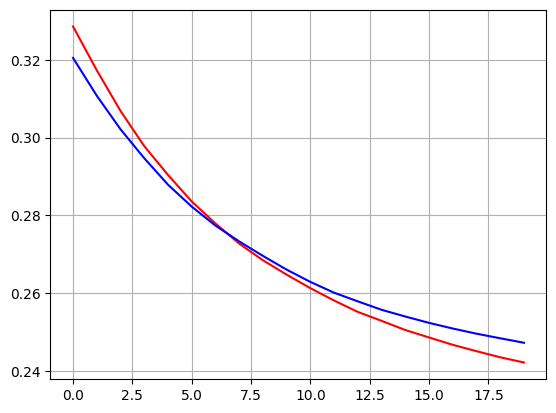

In [123]:
# Model accuracy Graph
plt.plot(model_train.history['loss'],color='Red')
plt.plot(model_train.history['val_loss'],color='blue')
plt.grid()

# Description 
- So, by replacing activation function with 'mean_squared_error' we achivedaround 0.18 of loss which is better than all the hypothesize.
- In this, we have additional hidden layers, additional denses, ReLU as activation function, and 'mean_squared_error' as loss function.  

# Part 2 : PyTorch ---------------------------------------------------------

In [124]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim


# Step 1 : import the dataset

In [125]:
data = pd.read_csv('diabetes.csv')
data.columns

Index(['-0.294118', '0.487437', '0.180328', '-0.292929', '0', '0.00149028',
       '-0.53117', '-0.0333333', '0.1'],
      dtype='object')

# Step 2: Preprocessing the Data & Visualization

In [126]:
# We dont have column names, so adding header to them
data = data.set_axis(['fr1','fr2','fr3','fr4','fr5','fr6','fr7','fr9','target'],axis=1)

In [127]:
data.head()

,fr1,fr2,fr3,fr4,fr5,fr6,fr7,fr9,target
0,-0.882353,-0.145729,0.081967,-0.414141,0.000000,-0.207153,-0.766866,-0.666667,1
1,-0.058824,0.839196,0.049180,0.000000,0.000000,-0.305514,-0.492741,-0.633333,0
2,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,0.000000,1
3,0.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000,0
4,-0.411765,0.165829,0.213115,0.000000,0.000000,-0.236960,-0.894962,-0.700000,1


In [128]:
data.describe()

,fr1,fr2,fr3,fr4,fr5,fr6,fr7,fr9,target
count,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000
mean,-0.407807,0.218208,0.176500,-0.289731,-0.323961,-0.032289,-0.663427,-0.516799,0.654354
std,0.386493,0.306465,0.201420,0.258651,0.375608,0.205508,0.283202,0.400674,0.475893
min,-0.882353,-0.557789,-0.606557,-0.858586,-0.966903,-0.457526,-0.994876,-0.966667,0.000000
25%,-0.764706,-0.005025,0.016393,-0.494949,-0.716312,-0.179583,-0.858241,-0.866667,0.000000
50%,-0.529412,0.165829,0.180328,-0.292929,0.000000,-0.034277,-0.748506,-0.633333,1.000000
75%,0.000000,0.407035,0.311475,0.000000,0.000000,0.087929,-0.532451,-0.233333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [129]:
data.isnull().sum()

fr1       0
fr2       0
fr3       0
fr4       0
fr5       0
fr6       0
fr7       0
fr9       0
target    0
dtype: int64

In [130]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
753    False
754    False
755    False
756    False
757    False
Length: 758, dtype: bool

array([[<Axes: title={'center': 'fr1'}>, <Axes: title={'center': 'fr2'}>,
        <Axes: title={'center': 'fr3'}>],
       [<Axes: title={'center': 'fr4'}>, <Axes: title={'center': 'fr5'}>,
        <Axes: title={'center': 'fr6'}>],
       [<Axes: title={'center': 'fr7'}>, <Axes: title={'center': 'fr9'}>,
        <Axes: title={'center': 'target'}>]], dtype=object)

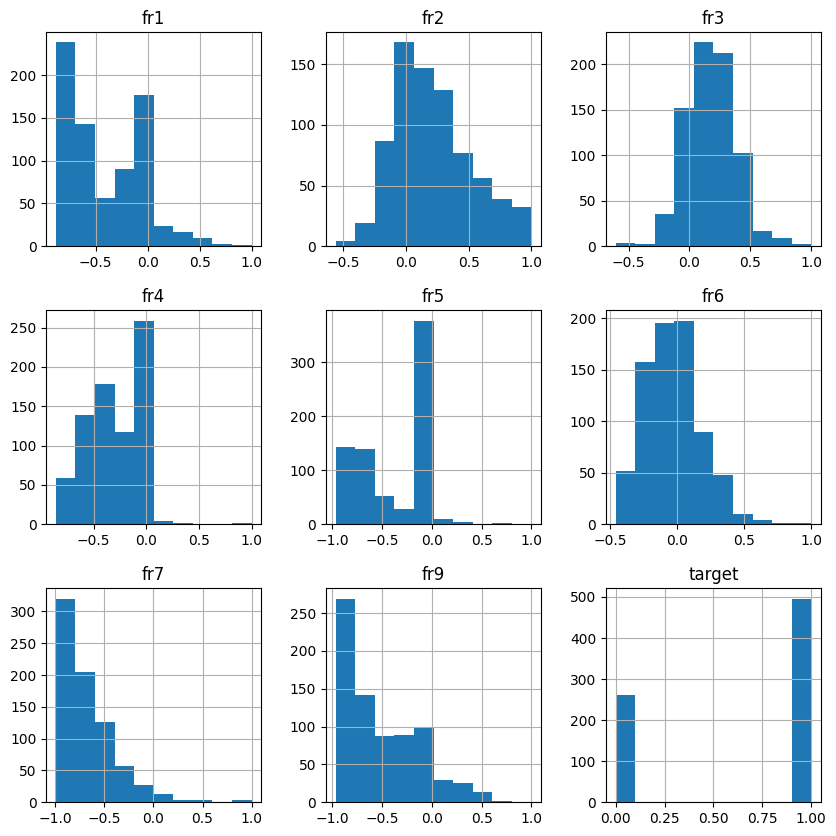

In [131]:
# we have already described many data visualization in Part 1.
data.hist(figsize=(10,10))

# Step 3: Split into 70% train 30% test

In [141]:

from sklearn.model_selection import train_test_split

x = data.drop(columns=['target'])
y = data['target']

features_normalized = (x - x.mean()) / x.std()

# Converting to PyTorch tensors
features_tensor = torch.tensor(features_normalized.values, dtype=torch.float32)
labels_tensor = torch.tensor(y.values, dtype=torch.float32)


x_train, x_test, y_train, y_test = train_test_split(features_tensor,labels_tensor,test_size=0.3,random_state=1)


# Step 4: Modify the model 


In [133]:
import torch.nn as nn
import torch.optim as optim

# Defining the model for our dataset
class DiabetesModel(nn.Module):
    def __init__(self):
        super(DiabetesModel, self).__init__()
        self.layer1 = nn.Linear(features_tensor.shape[1], 16)
        self.activation1 = nn.ReLU()
        self.layer2 = nn.Linear(16, 16)
        self.activation2 = nn.ReLU()
        self.output_layer = nn.Linear(16, 1)

    def forward(self, x):
        x = self.activation1(self.layer1(x))
        x = self.activation2(self.layer2(x))
        x = self.output_layer(x)
        return x

model = DiabetesModel()


# Step 5: Training the model

In [134]:
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.BCEWithLogitsLoss()

def train_model(model, x_train, y_train, epochs=100):
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(x_train)
        loss = criterion(outputs.squeeze(), y_train)
        loss.backward()
        optimizer.step()

train_model(model, x_train, y_train)

# Step 6-7 : Model Prediction & Evalution 

In [135]:
model.eval()
with torch.no_grad():
    outputs = model(x_test)
    predictions = torch.sigmoid(outputs) > 0.5
    accuracy = (predictions.squeeze().int() == y_test.int()).float().mean().item()

print(accuracy*100,'%')

75.87719559669495 %


# Step 8 : Hypothesize

By doubling size of the layer will imorove the accuracy.

In [145]:
# Changing width size

class DiabetesModel(nn.Module):
    def __init__(self):
        super(DiabetesModel, self).__init__()
        self.layer1 = nn.Linear(features_tensor.shape[1], 32)  # doubled width
        self.activation1 = nn.ReLU()
        self.layer2 = nn.Linear(32, 32) # doubled width
        self.activation2 = nn.ReLU()
        self.output_layer = nn.Linear(32, 1)

    def forward(self, x):
        x = self.activation1(self.layer1(x))
        x = self.activation2(self.layer2(x))
        x = self.output_layer(x)
        return x

model = DiabetesModel()

optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.BCEWithLogitsLoss()

def train_model(model, x_train, y_train, epochs=100):
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(x_train)
        loss = criterion(outputs.squeeze(), y_train)
        loss.backward()
        optimizer.step()

train_model(model, x_train, y_train)


model.eval()
with torch.no_grad():
    outputs = model(x_test)
    predictions = torch.sigmoid(outputs) > 0.5
    accuracy = (predictions.squeeze().int() == y_test.int()).float().mean().item()

print(accuracy*100,'%')

76.31579041481018 %
